### Variational inference

In many complex models, the posterior $p(\mathbf Z|\mathbf X)$ is intractable (but $p(\mathbf Z, \mathbf X)$ is tractable), which means we cannot compute directly given data. So the idea is to find a approximation distribution over $\mathbf Z$, i.e. $q(\mathbf Z)$. Under the _mean-field approximation_, there are two ways to introduce term $q(\mathbf Z)$ by approximation.

__1. KL-divergence__. We want to quantify the approximation by using KL-divergence between true distribution and proposed distribution, that 1KL-divergence__. We want to quantify the approximation by using KL-divergence between true distribution and proposed distribution, that i/s

\begin{equation*} 
KL(q(\mathbf Z)||p(\mathbf Z|\mathbf X)) = \int q(\mathbf Z) \log \frac{q(\mathbf Z)}{p(\mathbf Z|\mathbf X)} d\mathbf Z 
\end{equation*}

To make the approximation accurate, we want to minimize the KL-divergence over q. However, once again we encounter the intractable distribution $p(\mathbf Z|\mathbf X)$ in the KL-divergence. To solve this problem, we rewrite:

$$ KL(q||p) = \int \log \frac{q(\mathbf Z)}{p(\mathbf Z,\mathbf X)} d\mathbf Z + \log p(\mathbf X) $$

Here we abbreviate distribution $q(Z)$ and $p(\mathbf Z|\mathbf X)$ as $q$ and $p$. Now since p(X) has nothing to do with how we determine $q$. So __minimizing KL-divergence is equivalent to maximizing the evidence lower bound (ELBO)__, i.e. $\mathcal L(q)$:

\begin{equation*} 
\mathcal L(q) = - \int \log \frac{q(\mathbf Z)}{p(\mathbf Z,\mathbf X)} d\mathbf Z = \mathbb E_q [\log p(\mathbf Z, \mathbf X)] - \mathbb E_q [\log q(\mathbf Z)] = \mathbb E_q [\log p(\mathbf Z, \mathbf X)] + \mathcal{H}[q]
\end{equation*}
where $\mathcal{H}[q]$ is the entropy of $q$.

Here term $\mathbb E_q [\log p(\mathbf Z, \mathbf X)]$ is called _variational free energy_, $\mathbb E_q [\log q(\mathbf Z)]$ is the entropy of $q$. Thus to minimize the approximation error is to maximize the lower bound over $q$:

$$ \max_{q} \mathcal L(q) $$

__2. Jensen Inequality__. Another way of deriving approximation distribution $q$ is by considering the estimation of data log-likelihood:


\begin{equation*} 
\begin{split} 
\log p(\mathbf X) &= \log \int p(\mathbf Z, \mathbf X) d\mathbf Z\\ &= \log \int q(\mathbf Z) \frac{p(\mathbf Z, \mathbf X)}{q(\mathbf Z)} d\mathbf Z\\ &\ge \int q(\mathbf Z) \log \frac{p(\mathbf Z, \mathbf X)}{q(\mathbf Z)} d\mathbf Z\\ &= \mathbb E_q [\log p(\mathbf Z, \mathbf X)] - \mathbb E_q [\log q(\mathbf Z)]\\ &= \mathcal L(q) 
\end{split} 
\end{equation*}

It is also easy to see that the difference between data likelihood $\log p(\mathbf Z)$ and lower bound $\mathcal L(q)$ is the KL-divergence between $q$ and $p$.

<img src="http://slideplayer.com/234500/1/images/32/Variational+Lower+Bound.jpg" width=600>

Now that we have evidence lower bound containing a tractable distribution $p(\mathbf Z, \mathbf X)$ 
(good) and a unknown distribution over all latent variables $q(\mathbf Z)$(not so good), we still need a way to quantify $q(\mathbf Z)$. Under mean-field variational Bayes, we will make an assumption: latent variables can be factorized into several independent sets $\{\mathbf Z_i\}$ (specified by users), i.e.,

\begin{equation*} 
q(\mathbf Z) = \prod_i q_i(\mathbf Z_i| \mathbf X) 
\end{equation*}

Now we can derive the optimum solution of $q_i$ while others fixed is (expressed in logarithm):

$$ \log q_i^*(\mathbf Z_i) = \mathbb E_{-i} [\log p(\mathbf Z, \mathbf X)] + \text{const} $$

or

\begin{equation*} 
\begin{split} 
q_i^*(\mathbf Z_i) &\propto \exp \{ \mathbb E_{-i} [\log p(\mathbf Z, \mathbf X)] \} \\ &\propto \exp \{ \mathbb E_{-i} [\log p(\mathbf Z_i|\mathbf Z_{-i}, \mathbf X)] \} 
\end{split} 
\end{equation*}

Where
\begin{equation*} 
\mathbb E_{-i}[\log p(z_i|\mathbf Z_i, \mathbf X)] = \int \log p(\mathbf Z_i |\mathbf Z_{-i}, \mathbf X) \prod_{j \neq i} q_j(\mathbf Z_j) d\mathbf Z_j
\end{equation*}

Optimal $q_i(z_i)$ can be derived from here, although might be difficult to work with for some model (for most models it is not).

Once the optimal $\{q_i\}$ for all $\mathbf Z$ are found, we can alternatively update each latent variable until convergence (which is guaranteed due to the convexity of ELBO). Noted the convergent point is local optimal.

Source: http://dataera.org/2014/12/notes-on-variational-inference-part-i/

http://www.cs.columbia.edu/~blei/seminar/2016_discrete_data/notes/week_06.pdf

## Style and Content separation. Style transfer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
mat = scipy.io.loadmat('./datasets/YaleB_32x32.mat')
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'fea', 'gnd'])


In [3]:
X = mat['fea']
y = mat['gnd']

print(X.shape)
print(y.shape)

(2414, 1024)
(2414, 1)


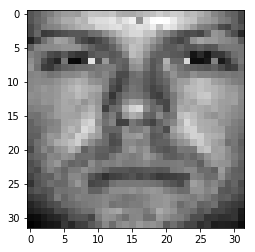

In [4]:
img = X[0,:].reshape(32, 32).T

plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [5]:
mat = scipy.io.loadmat('./datasets/face_reconstruction.mat')
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'eyes', 'faceA', 'faceB', 'model', 'nose'])


In [95]:
model = mat['model']

mu = model[0][0][0].T
V = model[0][0][1]
U = model[0][0][2]
Sigma = model[0][0][3] # Psi

mu = mu.flatten() #!

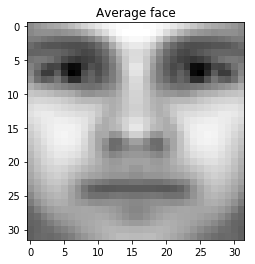

In [96]:
plt.imshow(mu.reshape(32, 32).T, cmap=plt.cm.gray)
plt.title('Average face')
plt.show()

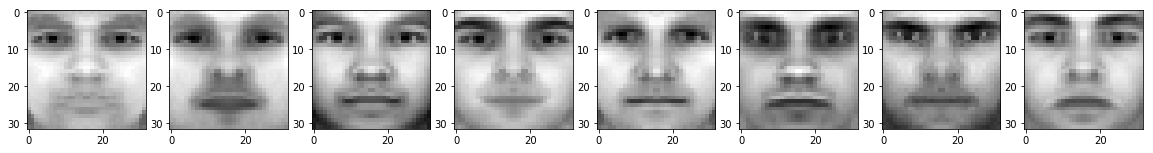

In [97]:
plt.figure(figsize = (20,20))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(mu.reshape(32, 32).T + 3*V[:,i].reshape(32, 32).T, cmap=plt.cm.gray)

plt.show()

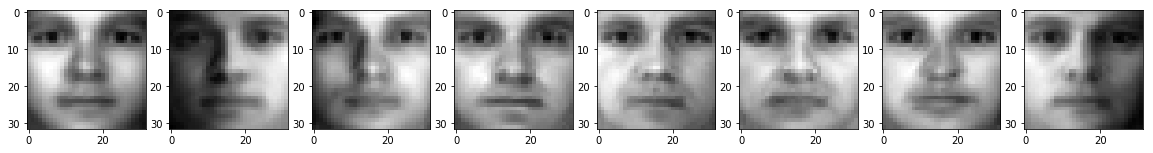

In [98]:
plt.figure(figsize = (20,20))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(mu.reshape(32, 32).T + 3*U[:,i].reshape(32, 32).T, cmap=plt.cm.gray)

plt.show()

Рассмотрим модель вероятностного линейного дискриминантного анализа (probabilistic linear discriminant analysis, PLDA): 

$s_i \sim \mathcal{N}(0, I)$

$h_{ij} \sim \mathcal{N}(0, I)$

$\epsilon_{ij} \sim \mathcal{N}(0, \Psi)$

$x_{ij} = \mu + Vs_i + Uh_{ij} + \epsilon_{ij}$

Правдоподобие наблюдаемого вектора $x_{ij}$:

$p(x_{ij}|s_i, h_{ij}) = \mathcal{N}(x_{ij}|\mu + Vs_i + Uh_{ij}, \Psi)$

Здесь i индексирует классы, а j индексирует объекты внутри класса. Для наглядности применим эту вероятностную модель для моделирования распределения интенсивностей пикселей изображений лиц (предположим, что они не ограничены интервалом и могут принимать любые значения на вещественной прямой). В этом случае классом будет считаться личность человека (identity). Тогда можно считать, что скрытый вектор $s$ являет собой представление личности человека, очищенное от «примесей» в виде условий освещения, выражения лица и т.д. В свою очередь вектор $h$ не содержит никакой информации о личности, и отвечает за различные вариации изображения одного и того же человека (см. рисунок ниже).
<img src="http://www.ifp.illinois.edu/~tchen5/respic/wei.jpg">

Поставим задачу синтезировать новое изображение (c) заданной личности (a), но при условиях освещения, соответствующих изображению другой личности (b). 

В рамках модели PLDA поставленную задачу можно формализовать так.

Дано:

$X_a = \{x_{a1}, x_{a2}, ..., x_{aL}\}$ - набор  изображений целевой личности (i=a) с произвольными условиями освещения.

$x_{bt}$ - изображение нецелевой личности (i=b) с целевыми условиями освещения (j=t).

$X_b = \{x_{b1}, x_{b2}, ..., x_{bM}\}$ - вспомогательный набор из  изображений нецелевой личности (i=b) с произвольными условиями освещения.

$\theta = \{\mu, V, U, \Psi\}$ - параметры обученной модели PLDA.

Найти:

$x_{at}$ - изображение целевой личности (i=a) с целевыми условиями освещения (j=t).

Данные: 

fea - двумерный массив, где каждая строка - [векторизованное](https://en.wikipedia.org/wiki/Vectorization_(mathematics)) изображение лица размером 32x32, gnd – одномерный массив с метками классов (класс=личность). 

Задание:

Выбрать две произвольные личности, например, a=1 и и b=2.
Для целевой личности взять изображения с номерами 16-32 в качестве $X_a$. В качестве $x_{bt}$ взять 49-е изображение нецелевой личности, а в качестве $X_b$ изображения с номерами 16-32.
В матрице fea изображения (строки) одного класса организованы в последовательно идущие блоки длиной 64 элемента. Поэтому, например, 10-му (j=10) изображению личности номер 5 (i=5), соответствует строка с номером 64*(i-1)+j = 64*4+10 = 266.

Найти $p(x_{at} | x_{bt}, X_a, X_b)$.

Опишем сначала общий алгоритм решения. Пусть имеется вероятностная модель трех случаных переменных $A$, $B$ и $C$, заданная совместной плотностью $p(A,B,C)$. Необходимо найти $p(B|C)$.

Применяя _sum rule_ и _product rule_ (формула полной вероятности и формула условной вероятности) 
<img src="https://datastoriesweb.files.wordpress.com/2017/06/p1.png">
в разной последовательности, можно прийти к результату:

1. sum rule :
$p(B,C) = \int p(A,B,C) dA$
2. product rule_: 
$p(B|C) = \frac{p(B,C)}{\int p(B,C) dB} = \frac{p(B,C)}{p(C)} \propto p(B,C)$

или
1. product rule :
$p(A,B|C) = \frac{p(A,B,C)}{\int p(A,B,C) dA dB} = \frac{p(A,B,C)}{p(C)} \propto p(A,B,C)$
2. sum rule :
$p(B|C) = \int p(A,B|C) dA$

Оба способа требуют нахождения значения интеграла $p(C) = \int p(A,B,C) dA dB$, что может оказаться невозможным. В этом случае необходимо найти аппроксимацию распределение $q(A,B|C) \approx p(A,B|C)$, для которой уже можно найти значение интерграла $p(B|C) \approx \int q(A,B|C) dA$.

Запишем сначала совместное распределение всех случаных переменных в этой модели:

$$p(x_{at}, x_{bt}, X_a, X_b, s_a, s_b, h_{bt}, H_a, H_b) = p(x_{at}|s_a, h_{bt}) p(x_{bt}|s_b, h_{bt}) p(X_a|s_a, H_a) p(X_b|s_b, H_b)p(s_a)p(s_b)p(h_{bt})p(H_a)p(H_b)$$

Проинтегрируем по $H_a$ и $H_b$:

$$p(x_{at}, s_a, s_b, h_{bt}| x_{bt}, X_a, X_b) = \frac{p(x_{at}, x_{bt}, X_a, X_b, s_a, s_b, h_{bt})}{p(x_{bt}, X_a, X_b)}$$

$$p(x_{at}, x_{bt}, X_a, X_b, s_a, s_b, h_{bt}) = p(x_{at}|s_a, h_{bt}) p(x_{bt}|s_b, h_{bt}) p(h_{bt}) p(X_a|s_a) p(X_b|s_b)p(s_a)p(s_b)  \propto p(x_{at}|s_a, h_{bt}) p(x_{bt}|s_b, h_{bt}) p(h_{bt}) p(s_a|X_a) p(s_b|X_b) $$

Для удобства обозначиим

$p(s_a|X_a) = \mathcal{N}(s_a|m_a, \Sigma_a)$

$p(s_b|X_b) = \mathcal{N}(s_b|m_b, \Sigma_b)$

где 

$\Sigma_a = (L V^T (UU^T + \Psi)^{-1} V + I)^{-1}$, $m_a = \Sigma_a V^T(UU^T + \Psi)^{-1} \sum_{j=1}^L (x_{aj} - \mu)$

$\Sigma_b = (M V^T (UU^T + \Psi)^{-1} V + I)^{-1}$, $m_b = \Sigma_b V^T(UU^T + \Psi)^{-1} \sum_{j=1}^M (x_{bj} - \mu)$


Проинтегрируем по $s_a$ и $s_b$:

$$p(x_{at}, x_{bt}, X_a, X_b, h_{bt}) \propto p(x_{at}| h_{bt}, X_a) p(x_{bt}|h_{bt}, X_b) p(h_{bt}) $$

где

$p(x_{at}|h_{bt}, X_a) = \mathcal{N}(x_{at}|\mu + Vm_a + Uh_b, V\Sigma_aV^T + \Psi)$

$p(x_{bt}|h_{bt}, X_b) = \mathcal{N}(x_{bt}|\mu + Vm_b + Uh_b, V\Sigma_bV^T + \Psi)$

Учитывая, что $p(x_{at} | x_{bt}, x_{bt}, X_a, X_b) = \int p(x_{at}, h_{bt} | x_{bt}, X_a, X_b ) d h_{bt}$, найдем сначала совместное условное распределение ненаблюдаемых переменных

$$p(x_{at}, h_{bt} | x_{bt}, X_a, X_b ) = \frac{p(x_{at}, x_{bt}, X_a, X_b, h_{bt})}{p(x_{bt}, X_a, X_b)} \propto p(x_{at}| h_{bt}, X_a) p(x_{bt}|h_{bt}, X_b) p(h_{bt}) $$

Обозначая $Z = \{x_{at}, h_{bt} \}$ и $X = \{ x_{bt}, X_a, X_b \}$, применим описанный выше способ получения приближенного распределения $q(Z) \approx p(Z|X)$, максимизируя $\mathcal L(q)$. Если искать $q$ в классе факторизованных распределение $q(Z) = \prod_{k} q(Z_k)$, то распределения $q(Z_k)$ можно найти по общей формуле:

$$ \log q_i^*(Z_i) = \mathbb E_{-i} [\log p(Z, X)] + \text{const} $$

В данном случае предположим, что $p(x_{at}, h_{bt} | x_{bt}, X_a, X_b )  \approx q(x_{at}, h_{bt}) = q(x_{at})q(h_{bt})$. Тогда максимизация $\mathcal L(q)$ сводится к итеративному пересчету параметров следующих распределений:

$\log q(x_{at}) = \mathbb{E}_{q(h_b)}[\log p(x_{at}, x_{bt}, X_a, X_b, h_{bt})] + const$

$\log q(h_{bt}) = \mathbb{E}_{q(x_{at})}[\log p(x_{at}, x_{bt}, X_a, X_b, h_{bt})] + const$

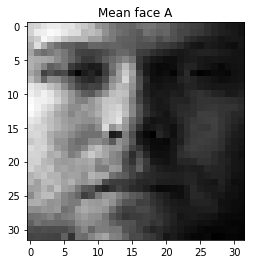

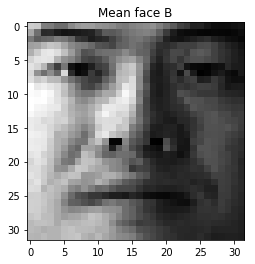

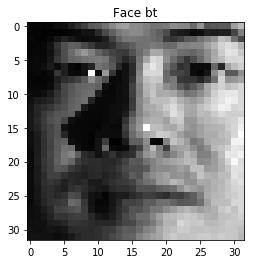

In [99]:
a = 0
b = 1

X_a = X[64*a+15:64*a+32,:]
X_b = X[64*b+15:64*b+32,:]

x_bt = X[64*b+48,:]


plt.imshow(np.mean(X_a, axis=0).reshape(32, 32).T, cmap=plt.cm.gray)
plt.title('Mean face A')
plt.show()

plt.imshow(np.mean(X_b, axis=0).reshape(32, 32).T, cmap=plt.cm.gray)
plt.title('Mean face B')
plt.show()

plt.imshow(x_bt.reshape(32, 32).T, cmap=plt.cm.gray)
plt.title('Face bt')
plt.show()

In [85]:
from scipy.linalg import inv

dim = X.shape[1]
s_dim = V.shape[1]
h_dim = U.shape[1]

#
P = inv(U.dot(U.T) + Sigma)

L = X_a.shape[0]
Sigma_a = inv(L*V.T.dot(P).dot(V) + np.eye(s_dim))
m_a = Sigma_a.dot(V.T).dot(P).dot(np.sum(X_a - mu.T, axis=0).T)

M = X_b.shape[0]
Sigma_b = inv(M*V.T.dot(P).dot(V) + np.eye(s_dim))
m_b = Sigma_b.dot(V.T).dot(P).dot(np.sum(X_b - mu.T, axis=0).T)


#
Sigma_at = V.dot(Sigma_a).dot(V.T) + Sigma

S_a_inv = inv(V.dot(Sigma_a).dot(V.T) + Sigma)
S_b_inv = inv(V.dot(Sigma_b).dot(V.T) + Sigma)

Sigma_h = inv(U.T.dot(S_a_inv + S_b_inv).dot(U) + np.eye(h_dim))

m_at = np.random.randn(dim,)
m_h = np.random.randn(h_dim,)

for iter in range(10):
    
    # update q(h_bt)
    Sx = S_a_inv.dot(m_at - mu - V.dot(m_a)) + S_b_inv.dot(x_bt - mu - V.dot(m_b))
    m_h = Sigma_h.dot(U.T).dot(Sx)
    
    # update q(x_at)
    m_at = mu + V.dot(m_a) + U.dot(m_h)


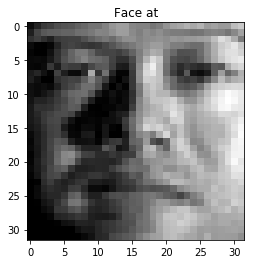

In [100]:
m_at[m_at < 0] = 0
m_at[m_at > 255] = 255

plt.imshow(m_at.reshape(32, 32).T, cmap=plt.cm.gray)
plt.title('Face at')
plt.show()